In [29]:
import os
from PIL import Image
import numpy as np
import h5py
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
def make_square_and_resize(folder_path, output_size):
  for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
      image_path = os.path.join(folder_path, filename)
      image = Image.open(image_path)

      width, height = image.size
      min_dim = min(width, height)
      left = (width - min_dim) // 2
      top = (height - min_dim) // 2
      right = (width + min_dim) // 2
      bottom = (height + min_dim) // 2
      image = image.crop((left, top, right, bottom))

      image = image.resize((output_size, output_size))

      image.save(image_path)

pizza_folder = "./pizza/"
not_pizza_folder = "./not_pizza/"
output_size = 64

make_square_and_resize(pizza_folder, output_size)
make_square_and_resize(not_pizza_folder, output_size)

In [46]:
def convert_images_to_array(folder_path):
  image_array = []
  for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"): 
      image_path = os.path.join(folder_path, filename)
      image = Image.open(image_path).convert('RGB')
      image_array.append(np.array(image))
  return np.array(image_array)

pizza_path = "./pizza/"
pizza_array = convert_images_to_array(pizza_path)

not_pizza_path = "./not_pizza/"
not_pizza_array = convert_images_to_array(not_pizza_path)

print(pizza_array.shape)
print(not_pizza_array.shape)

(983, 64, 64, 3)
(983, 64, 64, 3)


In [47]:
x = np.concatenate((pizza_array, not_pizza_array))
x.shape

(1966, 64, 64, 3)

In [48]:
y = np.concatenate((np.ones(983), np.zeros(983)))
y.shape

(1966,)

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [50]:
with h5py.File('datos.h5', 'w') as f:
  f.create_dataset('x_train', data=x_train)
  f.create_dataset('y_train', data=y_train)
  f.create_dataset('x_test', data=x_test)
  f.create_dataset('y_test', data=y_test)

y = 1.0, it's a 'Pizza' picture.


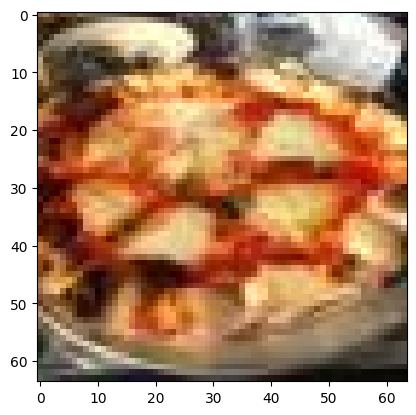

In [52]:
index = 982
classes = ["Non-pizza", "Pizza"]
plt.imshow(x[index])
print ("y = " + str(y[int(index)]) + ", it's a '" + classes[int(y[index])] +  "' picture.")